In [1]:
import pandas as pd
# from econtools.metrics import reg
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
var_year = pd.read_csv("../data/output_data/Full_Trial_Data.csv",
                       usecols=["variety_id","first_year","GE"]).drop_duplicates()

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_24704\3489333505.py:1: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  var_year = pd.read_csv("../data/output_data/Full_Trial_Data.csv",


In [3]:
dfd = pd.read_csv("../results/dwight_fe_now.csv")
dfj = pd.read_csv("../results/jack_fe_now.csv")
dfw = pd.read_csv("../results/williams_fe_now.csv")


# Variety FE, No Weather

dfd = dfd.iloc[:-29]
dfd.columns = ['variety_id',"est","se","t","p"]
dfd['est_cor'] = dfd['est']
dfd.loc[dfd['p']>=.1,"est_cor"] = 0 
dfd['variety_id'] = dfd['variety_id'].apply(lambda x: x.split("public_variety-DWIGHT")[1][2:])
dfd_now = dfd.merge(var_year,how='left')

dfj = dfj.iloc[:-29]
dfj.columns = ['variety_id',"est","se","t","p"]
dfj['est_cor'] = dfj['est']
dfj.loc[dfj['p']>=.1,"est_cor"] = 0 
dfj['variety_id'] = dfj['variety_id'].apply(lambda x: x.split("public_variety-JACK")[1][2:])
dfj_now = dfj.merge(var_year,how='left')

dfw = dfw.iloc[:-29]
dfw.columns = ['variety_id',"est","se","t","p"]
dfw['est_cor'] = dfw['est']
dfw.loc[dfw['p']>=.1,"est_cor"] = 0 
dfw['variety_id'] = dfw['variety_id'].apply(lambda x: x.split("public_variety-WILLIAMS_82")[1][2:])
dfw_now = dfw.merge(var_year,how='left')

In [4]:
# Variety FE
dfd = pd.read_csv("../results/dwight_fe.csv")
dfj = pd.read_csv("../results/jack_fe.csv")
dfw = pd.read_csv("../results/williams_fe.csv")

dfd = dfd.iloc[:-29]
dfd.columns = ['variety_id',"est","se","t","p"]
dfd['est_cor'] = dfd['est']
dfd.loc[dfd['p']>=.1,"est_cor"] = 0 
dfd['variety_id'] = dfd['variety_id'].apply(lambda x: x.split("public_variety-DWIGHT")[1][2:])
dfd = dfd.merge(var_year,how='left')

dfj = dfj.iloc[:-29]
dfj.columns = ['variety_id',"est","se","t","p"]
dfj['est_cor'] = dfj['est']
dfj.loc[dfj['p']>=.1,"est_cor"] = 0 
dfj['variety_id'] = dfj['variety_id'].apply(lambda x: x.split("public_variety-JACK")[1][2:])
dfj = dfj.merge(var_year,how='left')

dfw = dfw.iloc[:-29]
dfw.columns = ['variety_id',"est","se","t","p"]
dfw['est_cor'] = dfw['est']
dfw.loc[dfw['p']>=.1,"est_cor"] = 0 
dfw['variety_id'] = dfw['variety_id'].apply(lambda x: x.split("public_variety-WILLIAMS_82")[1][2:])
dfw = dfw.merge(var_year,how='left')


In [5]:
dfd_vfe = pd.read_csv("../results/vfe_year_d.csv") 
dfd_vfe.columns = ["label","est","se","t","p"]
dfd_vfe['year'] = dfd_vfe['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dfd_vfe = dfd_vfe.dropna()
Ed_vfe = dfd_vfe.set_index(["year"])['est']
Ed_vfe.loc["1997"] = 0
Ed_vfe = Ed_vfe.sort_index()
SEd_vfe = dfd_vfe.set_index(["year"])['se']*1.96
SEd_vfe.loc["1997"] = 0
SEd_vfe = SEd_vfe.sort_index()


In [6]:
dfj_vfe = pd.read_csv("../results/vfe_year_j.csv") 
dfj_vfe.columns = ["label","est","se","t","p"]
dfj_vfe['year'] = dfj_vfe['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dfj_vfe = dfj_vfe.dropna()
Ej_vfe = dfj_vfe.set_index(["year"])['est']
Ej_vfe.loc["1997"] = 0
Ej_vfe = Ej_vfe.sort_index()
SEj_vfe = dfj_vfe.set_index(["year"])['se']*1.96
SEj_vfe.loc["1997"] = 0
SEj_vfe = SEj_vfe.sort_index()


In [7]:
dfw_vfe = pd.read_csv("../results/vfe_year_w.csv") 
dfw_vfe.columns = ["label","est","se","t","p"]
dfw_vfe['year'] = dfw_vfe['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dfw_vfe = dfw_vfe.dropna()
Ew_vfe = dfw_vfe.set_index(["year"])['est']
Ew_vfe.loc["1997"] = 0
Ew_vfe = Ew_vfe.sort_index()
SEw_vfe = dfw_vfe.set_index(["year"])['se']*1.96
SEw_vfe.loc["1997"] = 0
SEw_vfe = SEw_vfe.sort_index()

In [8]:
d_p = dfd[dfd['p']<.1].shape[0]/dfd.dropna().shape[0]*100
j_p = dfj[dfj['p']<.1].shape[0]/dfj.dropna().shape[0]*100
w_p = dfw[dfw['p']<.1].shape[0]/dfw.dropna().shape[0]*100

d_null = (1-dfd.dropna().shape[0]/dfd.shape[0]) *100
j_null = (1-dfj.dropna().shape[0]/dfj.shape[0]) *100
w_null = (1-dfw.dropna().shape[0]/dfw.shape[0]) *100

pd.DataFrame([[d_p,j_p,w_p],[d_null,j_null,w_null]]).round(2)

,0,1,2
0,36.25,74.49,98.47
1,3.22,3.19,3.17


Year FE, Main Models

In [9]:
## Unadjusted
# MG II
d2u = pd.read_csv("../results/year_coefs2u.csv")
d2u.columns = ["label","est","se","t","p"]
d2u['year'] = d2u['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
d2u = d2u.dropna()
E2u = d2u.set_index(["year"])['est']
SE2u = d2u.set_index(["year"])['se']*1.96

d2 = pd.read_csv("../results/year_coefs2.csv")
d2.columns = ["label","est","se","t","p"]
d2['year'] = d2['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
d2 = d2.dropna()
E2 = d2.set_index(["year"])['est']
SE2 = d2.set_index(["year"])['se']*1.96

# MG III
d3u = pd.read_csv("../results/year_coefs3u.csv")
d3u.columns = ["label","est","se","t","p"]
d3u['year'] = d3u['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
d3u = d3u.dropna()
E3u = d3u.set_index(["year"])['est']
SE3u = d3u.set_index(["year"])['se']*1.96

d3 = pd.read_csv("../results/year_coefs3.csv")
d3.columns = ["label","est","se","t","p"]
d3['year'] = d3['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
d3 = d3.dropna()
E3 = d3.set_index(["year"])['est']
SE3 = d3.set_index(["year"])['se']*1.96


# Jack
dj = pd.read_csv("../results/year_coefs_j.csv")
dj.columns = ["label","est","se","t","p"]
dj['year'] = dj['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dj = dj.dropna()
Ej = dj.set_index(["year"])['est']
SEj = dj.set_index(["year"])['se']*1.96

# Dwight
dd = pd.read_csv("../results/year_coefs_d.csv")
dd.columns = ["label","est","se","t","p"]
dd['year'] = dd['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dd = dd.dropna()
Ed = dd.set_index(["year"])['est']
SEd = dd.set_index(["year"])['se']*1.96

# Williams 82
dw = pd.read_csv("../results/year_coefs_w.csv")
dw.columns = ["label","est","se","t","p"]
dw['year'] = dw['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
dw = dw.dropna()
Ew = dw.set_index(["year"])['est']
SEw = dw.set_index(["year"])['se']*1.96

E2.index = [int(x) for x in E2.index]
E2.loc[1997] = 0
E2 = E2.sort_index()
SE2.loc["1997"] = 0
SE2 = SE2.sort_index()

E2u.index = [int(x) for x in E2u.index]
E2u.loc[1997] = 0
E2u = E2u.sort_index()
SE2u.loc["1997"] = 0
SE2u = SE2u.sort_index()

E3.index = [int(x) for x in E3.index]
E3.loc[1997] = 0
E3 = E3.sort_index()
SE3.loc["1997"] = 0
SE3 = SE3.sort_index()

E3u.index = [int(x) for x in E3u.index]
E3u.loc[1997] = 0
E3u = E3u.sort_index()
SE3u.loc["1997"] = 0
SE3u = SE3u.sort_index()

Ej.index = [int(x) for x in Ej.index]
Ej.loc[1997] = 0
Ej = Ej.sort_index()
SEj.loc["1997"] = 0
SEj = SEj.sort_index()

Ed.index = [int(x) for x in Ed.index]
Ed.loc[1997] = 0
Ed = Ed.sort_index()
SEd.loc["1997"] = 0
SEd = SEd.sort_index()

Ew.index = [int(x) for x in Ew.index]
Ew.loc[1997] = 0
Ew = Ew.sort_index()
SEw.loc["1997"] = 0
SEw = SEw.sort_index()

### Figure 7

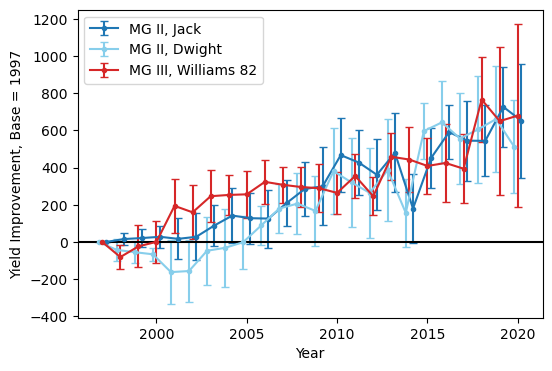

In [10]:
f,a = plt.subplots(figsize=(6,4))
offset = .2
Xrange1 = [int(x) +offset for x in Ew.index]
Xrange2 = [int(x) -offset for x in Ew.index]
Xrange3 = [int(x) - 0 for x in Ew.index]

a.errorbar(Xrange1[2:],Ej[2:],yerr=SEj[2:],capsize=3,marker="o",ms=3,color="C0",label="MG II, Jack")
a.errorbar(Xrange2[2:],Ed[2:],yerr=SEd[2:],capsize=3,marker="o",ms=3,color="skyblue",label="MG II, Dwight")
a.errorbar(Xrange3[2:],Ew[2:],yerr=SEw[2:],capsize=3,marker="o",ms=3,color="C3",label="MG III, Williams 82")
plt.axhline(0,color="black")
plt.legend()
# Ej.plot(yerr=SEj,capsize=3,marker="o",ms=3,color="C0")
# Ed.plot(yerr=SEd,capsize=3,marker="o",ms=3,color="skyblue")
# Ew.plot(yerr=SEw,capsize=3,marker="o",ms=3,color="C3")
plt.ylabel("Yield Improvement, Base = 1997")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_MG_Adj.pdf",bbox_inches="tight",dpi=300)

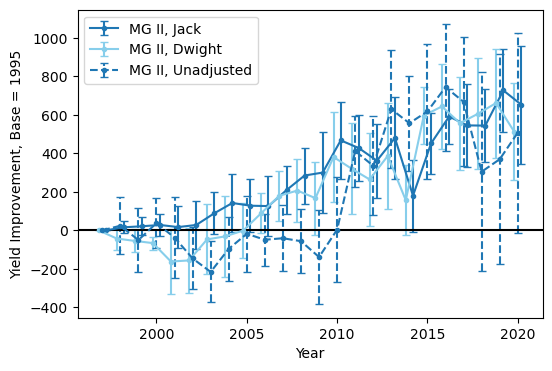

In [11]:
f,a = plt.subplots(figsize=(6,4))

p1 = plt.errorbar(Xrange1[2:],Ej[2:],yerr=SEj[2:],capsize=3,marker="o",ms=3,color="C0",label="MG II, Jack")
p2 = plt.errorbar(Xrange2[2:],Ed[2:],yerr=SEd[2:],capsize=3,marker="o",ms=3,color="skyblue",label="MG II, Dwight")
p3 = plt.errorbar(Xrange3[2:],E2[2:],yerr=SE2[2:],capsize=3,marker="o",ms=3,color="C0",label="MG II, Unadjusted",ls="--")
p3[-1][0].set_linestyle('--')
plt.axhline(0,color="black")
plt.legend()
plt.ylabel("Yield Improvement, Base = 1995")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_MGII.pdf",bbox_inches="tight",dpi=300)

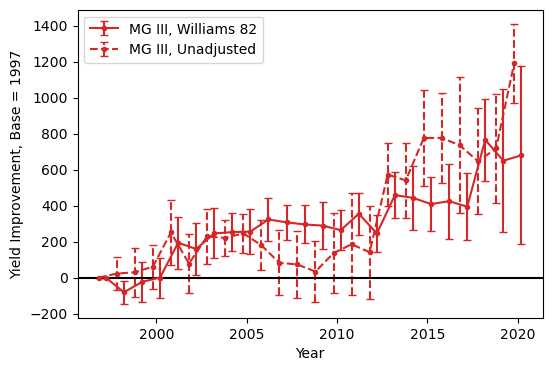

In [12]:
f,a = plt.subplots(figsize=(6,4))


p1 = plt.errorbar(Xrange1[2:],Ew[2:],yerr=SEw[2:],capsize=3,marker="o",ms=3,color="C3",label="MG III, Williams 82")
p2 = plt.errorbar(Xrange2[2:],E3[2:],yerr=SE3[2:],capsize=3,marker="o",ms=3,color="C3",label="MG III, Unadjusted",ls="--")
p2[-1][0].set_linestyle("--")
plt.axhline(0,color="black")
plt.legend()
plt.ylabel("Yield Improvement, Base = 1997")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_MGIII.pdf",bbox_inches="tight",dpi=300)

### Figure 8

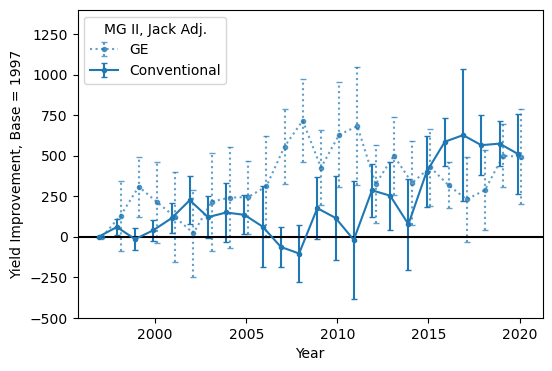

In [13]:
d = pd.read_csv("../results/year_coefs_j_GE.csv")

d.columns = ["label","est","se","t","p"]

d['year'] = d['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")

d = d.dropna()

d['GE'] = d['label'].str.contains("GE")

E = d.set_index(["year","GE"])['est'].unstack()
SE = d.set_index(["year","GE"])['se'].unstack()*1.96
E.loc["1997"] = 0
SE.loc["1997"] = 0
E = E.sort_index()
SE = SE.sort_index()


offset = .1
Xrange1 = [int(x) +offset for x in E[True].index]
Xrange2 = [int(x) -offset for x in E[True].index]
f,a = plt.subplots(figsize=(6,4))

p2 = plt.errorbar(Xrange1[2:],E[True][2:],yerr=SE[True][2:],marker="o",ms=3,capsize=2,ls=":",alpha=.7,color="C0",label="GE")
p2[-1][0].set_linestyle(":")

plt.errorbar(Xrange2[2:],E[False][2:],yerr=SE[False][2:],marker="o",ms=3,capsize=2,color="C0",label="Conventional")
plt.axhline(0,color="black")
plt.legend(loc='upper left',title="MG II, Jack Adj.")
plt.ylim(-500,1400)
plt.ylabel("Yield Improvement, Base = 1997")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_GE_J.pdf",bbox_inches="tight",dpi=300)

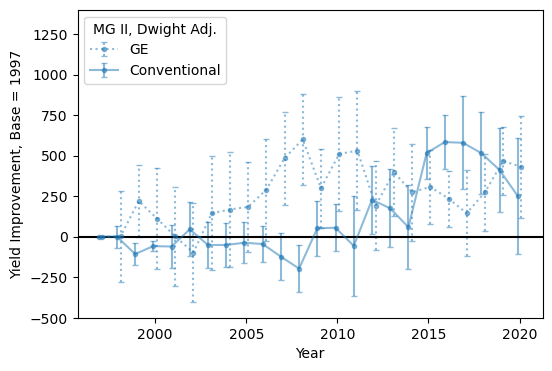

In [14]:
d = pd.read_csv("../results/year_coefs_d_GE.csv")
d.columns = ["label","est","se","t","p"]
d['year'] = d['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")
d = d.dropna()
d['GE'] = d['label'].str.contains("GE")
E = d.set_index(["year","GE"])['est'].unstack()
SE = d.set_index(["year","GE"])['se'].unstack()*1.96
E.loc["1997"] = 0
SE.loc["1997"] = 0
E = E.sort_index()
SE = SE.sort_index()

offset = .1
Xrange1 = [int(x) +offset for x in E[True].index]
Xrange2 = [int(x) -offset for x in E[True].index]
f,a = plt.subplots(figsize=(6,4))

p2 = plt.errorbar(Xrange1[2:],E[True][2:],yerr=SE[True][2:],marker="o",ms=3,capsize=2,ls=":",alpha=.5,color="C0",label="GE")
p2[-1][0].set_linestyle(":")
plt.errorbar(Xrange2[2:],E[False][2:],yerr=SE[False][2:],marker="o",ms=3,capsize=2,alpha=.5,color="C0",label="Conventional")
plt.axhline(0,color="black")
plt.legend(loc='upper left',title="MG II, Dwight Adj.")
plt.ylim(-500,1400)
plt.ylabel("Yield Improvement, Base = 1997")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_GE_D.pdf",bbox_inches="tight",dpi=300)

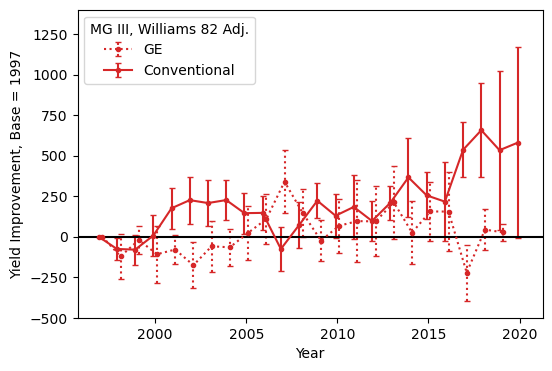

In [15]:
d = pd.read_csv("../results/year_coefs_w_GE.csv")

d.columns = ["label","est","se","t","p"]

d['year'] = d['label'].str.extract("\(first_year\), \"1997\"\)(\d{4})")

d = d.dropna()

d['GE'] = d['label'].str.contains("GE")

E = d.set_index(["year","GE"])['est'].unstack()
SE = d.set_index(["year","GE"])['se'].unstack()*1.96
E.loc["1997"] = 0
SE.loc["1997"] = 0
E = E.sort_index()
SE = SE.sort_index()

offset = .1
Xrange1 = [int(x) +offset for x in E[True].index]
Xrange2 = [int(x) -offset for x in E[True].index]
f,a = plt.subplots(figsize=(6,4))

p2 = plt.errorbar(Xrange1[2:],E[True][2:],yerr=SE[True][2:],marker="o",ms=3,capsize=2,ls=":",alpha=1,color="C3",label="GE")
p2[-1][0].set_linestyle(":")
plt.errorbar(Xrange2[2:],E[False][2:],yerr=SE[False][2:],marker="o",ms=3,capsize=2,alpha=1,color="C3",label="Conventional")
plt.axhline(0,color="black")
plt.legend(loc='upper left',title="MG III, Williams 82 Adj.")
plt.ylim(-500,1400)
plt.ylabel("Yield Improvement, Base = 1997")
plt.xlabel("Year")
plt.savefig("../figs/YearFE_GE_W.pdf",bbox_inches="tight",dpi=300)

In [16]:
fe_d = \
pd.concat([dfd.groupby(["first_year"])['est'].mean(),
           dfd.groupby(["first_year"])['est_cor'].mean(),
           dfd.groupby(["first_year"])['est'].std()],axis=1)

fe_d.columns = ["est","est_cor","sd"]

fe_j = \
pd.concat([dfj.groupby(["first_year"])['est'].mean(),
           dfj.groupby(["first_year"])['est_cor'].mean(),
           dfj.groupby(["first_year"])['est'].std()],axis=1)

fe_j.columns = ["est","est_cor","sd"]

fe_w = \
pd.concat([dfw.groupby(["first_year"])['est'].mean(),
           dfw.groupby(["first_year"])['est_cor'].mean(),
           dfw.groupby(["first_year"])['est'].std()],axis=1)

fe_w.columns = ["est","est_cor","sd"]

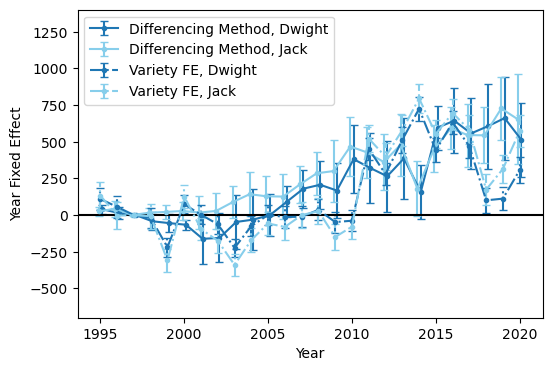

In [17]:
f,a = plt.subplots(figsize=(6,4))

plt.errorbar(Xrange1,Ed,yerr=SEd,capsize=3,marker="o",ms=3,color="C0",label="Differencing Method, Dwight")
plt.errorbar(Xrange2,Ej,yerr=SEj,capsize=3,marker="o",ms=3,color="skyblue",label="Differencing Method, Jack")
p2 = plt.errorbar(Xrange3,Ed_vfe,yerr=SEd_vfe,color="C0",ls="-.",capsize=3,marker="o",ms=3,label="Variety FE, Dwight")
p2[-1][0].set_linestyle("-.")
p3 = plt.errorbar(Xrange3,Ej_vfe,yerr=SEj_vfe,color="skyblue",ls="-.",capsize=3,marker="o",ms=3,label="Variety FE, Jack")
p3[-1][0].set_linestyle("-.")
plt.axhline(0,color="black")
plt.legend()
plt.ylim(-700,1400)
plt.xlabel("Year")
plt.ylabel("Year Fixed Effect")
plt.savefig("../figs/YearFE_GE_MGII.pdf",bbox_inches="tight",dpi=300)

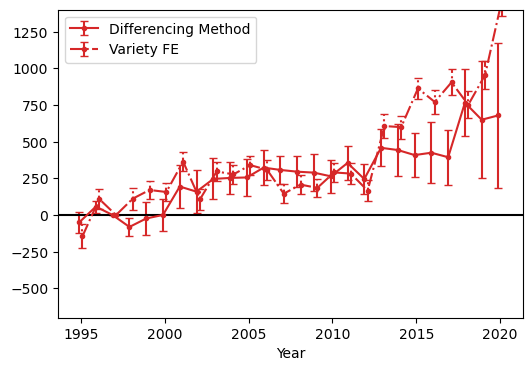

In [18]:
f,a = plt.subplots(figsize=(6,4))
p1 = plt.errorbar(Xrange2,Ew,yerr=SEw,capsize=3,marker="o",ms=3,color="C3",label="Differencing Method")
p2 = plt.errorbar(Xrange1,Ew_vfe,yerr=SEw_vfe,color="C3",ls="-.",capsize=3,marker="o",ms=3,label="Variety FE")
p2[-1][0].set_linestyle("-.")
plt.axhline(0,color="black")
plt.legend()
plt.ylim(-700,1400)
plt.xlabel("Year")
# plt.ylabel("Year Fixed Effect")
plt.savefig("../figs/YearFE_GE_MGIII.pdf",bbox_inches="tight",dpi=300)

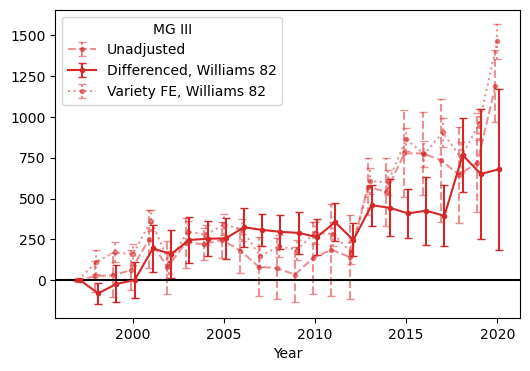

In [19]:
f,a = plt.subplots(figsize=(6,4))

p2 = plt.errorbar(Xrange2[2:],E3[2:],
                  yerr=SE3[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C3",
                  ls="--",
                  label="Unadjusted",
                  alpha=.5)
p2[-1][0].set_linestyle("--")

p1 = plt.errorbar(Xrange1[2:],Ew[2:],
                  yerr=SEw[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C3",
                  label="Differenced, Williams 82")



p3 = plt.errorbar(Xrange3[2:],Ew_vfe[2:],
                  yerr=SEw_vfe[2:],
                  color="C3",
                  ls=":",
                  capsize=3,
                  marker="o",
                  ms=3,
                  alpha=.5,
                  label="Variety FE, Williams 82")
p3[-1][0].set_linestyle(":")

plt.axhline(0,color="black")
plt.legend(title="MG III")
plt.xlabel("Year")
# plt.ylabel("Year Fixed Effect")
plt.savefig("../figs/YearFE_Compare_MGIII.pdf",bbox_inches="tight",dpi=300)

In [20]:
E3.index= [int(x) for x in E3.index]
E2.index= [int(x) for x in E2.index]
Ew_vfe.index= [int(x) for x in Ew_vfe.index]
Ej_vfe.index= [int(x) for x in Ej_vfe.index]
Ed_vfe.index= [int(x) for x in Ed_vfe.index]


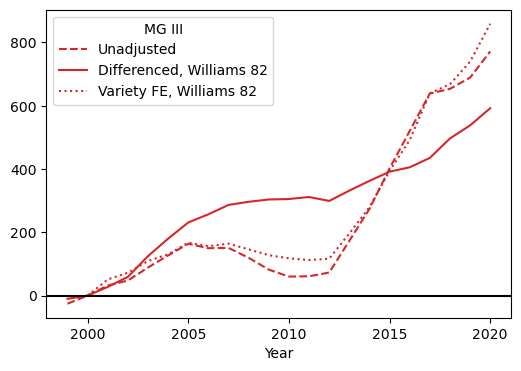

In [21]:
f,a = plt.subplots(figsize=(6,4))

(E3.rolling(5).mean()- E3.rolling(5).mean().loc[2000]).plot(label="Unadjusted",color="C3",ls="--")
(Ew.rolling(5).mean() - Ew.rolling(5).mean().loc[2000]).plot(label="Differenced, Williams 82",color="C3")
(Ew_vfe.rolling(5).mean().loc[2000:] - Ew_vfe.rolling(5).mean().loc[2000]).plot(label="Variety FE, Williams 82",ls=":",color="C3")
plt.axhline(0,color="black")
plt.xticks(np.arange(2000,2021,5))
plt.legend(title="MG III")
plt.xlabel("Year")
# plt.ylabel("Improvement Average, 5 Year Rolling")
plt.savefig("../figs/MGIII_Compare.pdf",dpi=300,bbox_inches="tight")

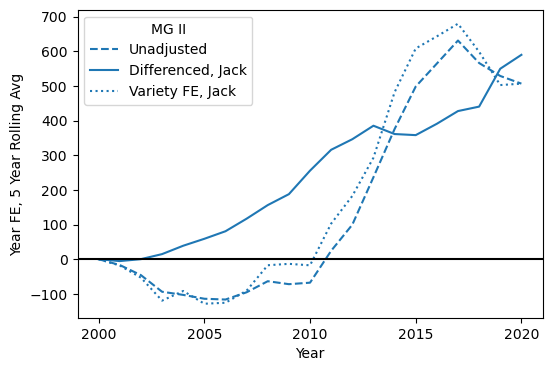

In [23]:
f,a = plt.subplots(figsize=(6,4))

(E2.rolling(5).mean()- E2.rolling(5).mean().loc[2000]).iloc[5:].plot(label="Unadjusted",color="C0",ls="--")
(Ej.rolling(5).mean() - Ej.rolling(5).mean().loc[2000]).iloc[5:].plot(label="Differenced, Jack",color="C0")
(Ej_vfe.rolling(5).mean().loc[2000:] - Ej_vfe.rolling(5).mean().loc[2000]).plot(label="Variety FE, Jack",ls=":")
plt.axhline(0,color="black")
plt.xticks(np.arange(2000,2021,5))
plt.legend(title="MG II")
plt.xlabel("Year")
plt.ylabel("Year FE, 5 Year Rolling Avg")
plt.savefig("../figs/MGII_Compare.pdf",dpi=300,bbox_inches="tight")

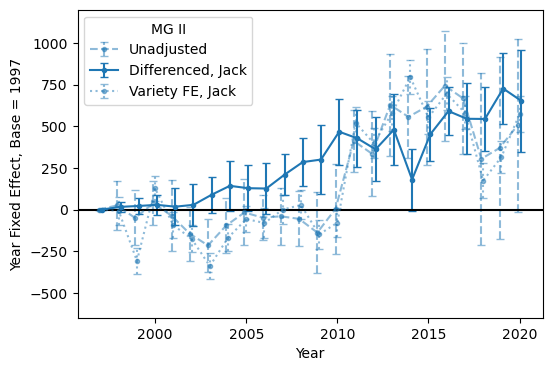

In [24]:
f,a = plt.subplots(figsize=(6,4))


p2 = plt.errorbar(Xrange2[2:],E2[2:],
                  yerr=SE2[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C0",
                  ls="--",
                  label="Unadjusted",
                  alpha=.5)
p2[-1][0].set_linestyle("--")


p1 = plt.errorbar(Xrange1[2:],Ej[2:],
                  yerr=SEj[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C0",
                  label="Differenced, Jack")

p3 = plt.errorbar(Xrange3[2:],Ej_vfe[2:],
                  yerr=SEj_vfe[2:],
                  color="C0",
                  ls=":",
                  capsize=3,
                  marker="o",
                  ms=3,
                  alpha=.5,
                  label="Variety FE, Jack")
p3[-1][0].set_linestyle(":")

plt.axhline(0,color="black")
plt.legend(title="MG II")
plt.xlabel("Year")
plt.ylabel("Year Fixed Effect, Base = 1997")
plt.ylim(-650,1200)
plt.savefig("../figs/YearFE_Compare_MGII.pdf",bbox_inches="tight",dpi=300)

### Year of Trial  

In [25]:
# Jack
dj = pd.read_csv("../results/yot_coefs_j.csv")
dj.columns = ["label","est","se","t","p"]
dj['year'] = dj['label'].str.extract("\(year\), \"1997\"\)(\d{4})")
dj = dj.dropna()
Ej_y = dj.set_index(["year"])['est']
SEj_y = dj.set_index(["year"])['se']*1.96

# Dwight
dd = pd.read_csv("../results/yot_coefs_d.csv")
dd.columns = ["label","est","se","t","p"]
dd['year'] = dd['label'].str.extract("\(year\), \"1997\"\)(\d{4})")
dd = dd.dropna()
Ed_y = dd.set_index(["year"])['est']
SEd_y = dd.set_index(["year"])['se']*1.96

# Williams 82
dw = pd.read_csv("../results/yot_coefs_w.csv")
dw.columns = ["label","est","se","t","p"]
dw['year'] = dw['label'].str.extract("\(year\), \"1997\"\)(\d{4})")
dw = dw.dropna()
Ew_y = dw.set_index(["year"])['est']
SEw_y = dw.set_index(["year"])['se']*1.96


Ej_y.index = [int(x) for x in Ej_y.index]
Ej_y.loc[1997] = 0
Ej_y = Ej_y.sort_index()
SEj_y.loc["1997"] = 0
SEj_y = SEj_y.sort_index()

Ed_y.index = [int(x) for x in Ed_y.index]
Ed_y.loc[1997] = 0
Ed_y = Ed_y.sort_index()
SEd_y.loc["1997"] = 0
SEd_y = SEd_y.sort_index()

Ew_y.index = [int(x) for x in Ew_y.index]
Ew_y.loc[1997] = 0
Ew_y = Ew_y.sort_index()
SEw_y.loc["1997"] = 0
SEw_y = SEw_y.sort_index()

SEj.index = [int(x) for x in SEj.index]
SEd.index = [int(x) for x in SEd.index]
SEw.index = [int(x) for x in SEw.index]


SEj_y.index = [int(x) for x in SEj_y.index]
SEd_y.index = [int(x) for x in SEd_y.index]
SEw_y.index = [int(x) for x in SEw_y.index]

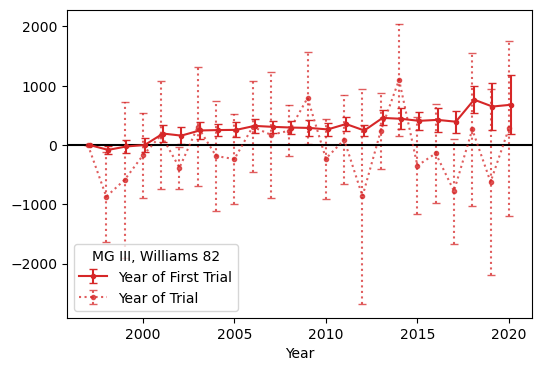

In [26]:
f,a = plt.subplots(figsize=(6,4))


p1 = plt.errorbar(Xrange1[2:],Ew[2:],
                  yerr=SEw[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C3",
                  label="Year of First Trial")



p3 = plt.errorbar(Xrange3[2:],Ew_y,
                  yerr=SEw_y,
                  color="C3",
                  ls=":",
                  capsize=3,
                  marker="o",
                  ms=3,
                  alpha=.75,
                  label="Year of Trial")
p3[-1][0].set_linestyle(":")

plt.axhline(0,color="black")
plt.legend(title="MG III, Williams 82")
plt.xlabel("Year")
# plt.ylabel("Year Fixed Effect")
plt.savefig("../figs/YearFE_MGIII_YoT.pdf",bbox_inches="tight",dpi=300)

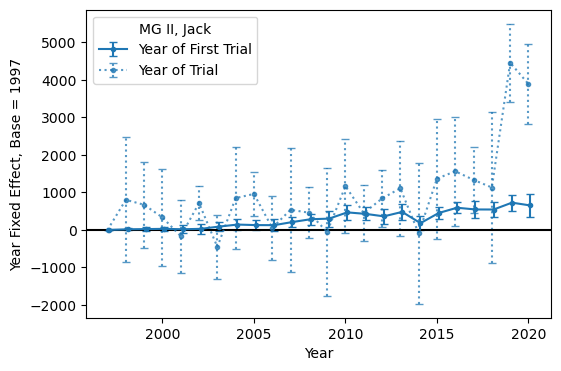

In [27]:
f,a = plt.subplots(figsize=(6,4))


p1 = plt.errorbar(Xrange1[2:],Ej[2:],
                  yerr=SEj[2:],
                  capsize=3,
                  marker="o",
                  ms=3,
                  color="C0",
                  label="Year of First Trial")

# p1 = plt.errorbar(Xrange1,Ed,
#                   yerr=SEd,
#                   capsize=3,
#                   marker="o",
#                   ms=3,
#                   color="skyblue",
#                   label="Differencing Method, Dwight")


p3 = plt.errorbar(Xrange3[2:],Ej_y,
                  yerr=SEj_y,
                  color="C0",
                  ls=":",
                  capsize=3,
                  marker="o",
                  ms=3,
                  alpha=.75,
                  label="Year of Trial")
p3[-1][0].set_linestyle(":")

plt.axhline(0,color="black")
plt.legend(title="MG II, Jack")
plt.xlabel("Year")
plt.ylabel("Year Fixed Effect, Base = 1997")
# plt.ylim(-650,1200)
plt.savefig("../figs/YearFE_MGII_YoT.pdf",bbox_inches="tight",dpi=300)